In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [96]:
data = pd.read_csv('data//Crime_Data_2010_2017.csv')

In [99]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [100]:
# Kolko mame riadkov, vidime, ze niektore stlpce nemaju hodnoty
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 26 columns):
DR Number                 1584316 non-null int64
Date Reported             1584316 non-null object
Date Occurred             1584316 non-null object
Time Occurred             1584316 non-null int64
Area ID                   1584316 non-null int64
Area Name                 1584316 non-null object
Reporting District        1584316 non-null int64
Crime Code                1584316 non-null int64
Crime Code Description    1583904 non-null object
MO Codes                  1412557 non-null object
Victim Age                1455657 non-null float64
Victim Sex                1439117 non-null object
Victim Descent            1439084 non-null object
Premise Code              1584240 non-null float64
Premise Description       1581565 non-null object
Weapon Used Code          524757 non-null float64
Weapon Description        524756 non-null object
Status Code               1584314 non-nul

In [101]:
# Dataset ma 1 584 316 riadkov, 26 stlpcov
data.shape

(1584316, 26)

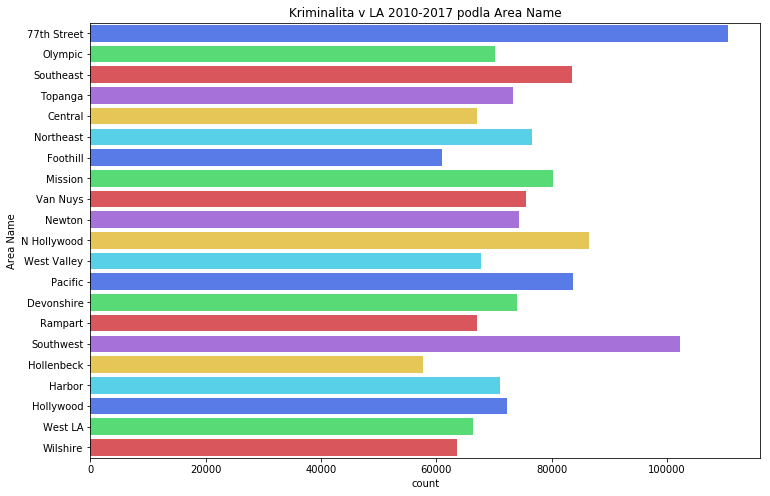

In [102]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y="Area Name",data=data,palette='bright',alpha=0.75)
ax.set_title('Kriminalita v LA 2010-2017 podla Area Name');

In [126]:
# Pocet chybajucich zaznamov pre kazdy stlpec
data.isnull().sum()
# zaujimavy su prazdne s victim Age - tieto zlociny su BEZ obete!

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        412
MO Codes                   171759
Victim Age                 128659
Victim Sex                 145199
Victim Descent             145232
Premise Code                   76
Premise Description          2751
Weapon Used Code          1059559
Weapon Description        1059560
Status Code                     2
Status Description              0
Crime Code 1                    7
Crime Code 2              1484319
Crime Code 3              1582133
Crime Code 4              1584247
Address                         0
Cross Street              1321583
Location                        9
dtype: int64

In [129]:
# Pocet 510 (VEHICLE - STOLEN) kriminality
data[data['Crime Code'] == 510].count()

DR Number                 121329
Date Reported             121329
Date Occurred             121329
Time Occurred             121329
Area ID                   121329
Area Name                 121329
Reporting District        121329
Crime Code                121329
Crime Code Description    121329
MO Codes                     183
Victim Age                104666
Victim Sex                   228
Victim Descent               226
Premise Code              121324
Premise Description       121310
Weapon Used Code              12
Weapon Description            12
Status Code               121329
Status Description        121329
Crime Code 1              121329
Crime Code 2                 118
Crime Code 3                   1
Crime Code 4                   0
Address                   121329
Cross Street               29362
Location                  121327
dtype: int64

In [104]:
unique_crimes = data.groupby('Crime Code Description', as_index=False)['DR Number'].count().sort_values(by="DR Number", ascending=False)
# pripadne as_index=['Crime Code Description']
unique_crimes

,Crime Code Description,DR Number
5,BATTERY - SIMPLE ASSAULT,145767
129,VEHICLE - STOLEN,121329
22,BURGLARY FROM VEHICLE,121318
21,BURGLARY,114751
112,THEFT PLAIN - PETTY ($950 & UNDER),113709
110,THEFT OF IDENTITY,100653
70,INTIMATE PARTNER - SIMPLE ASSAULT,85908
126,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",79433
127,VANDALISM - MISDEAMEANOR ($399 OR UNDER),71523
3,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",67631


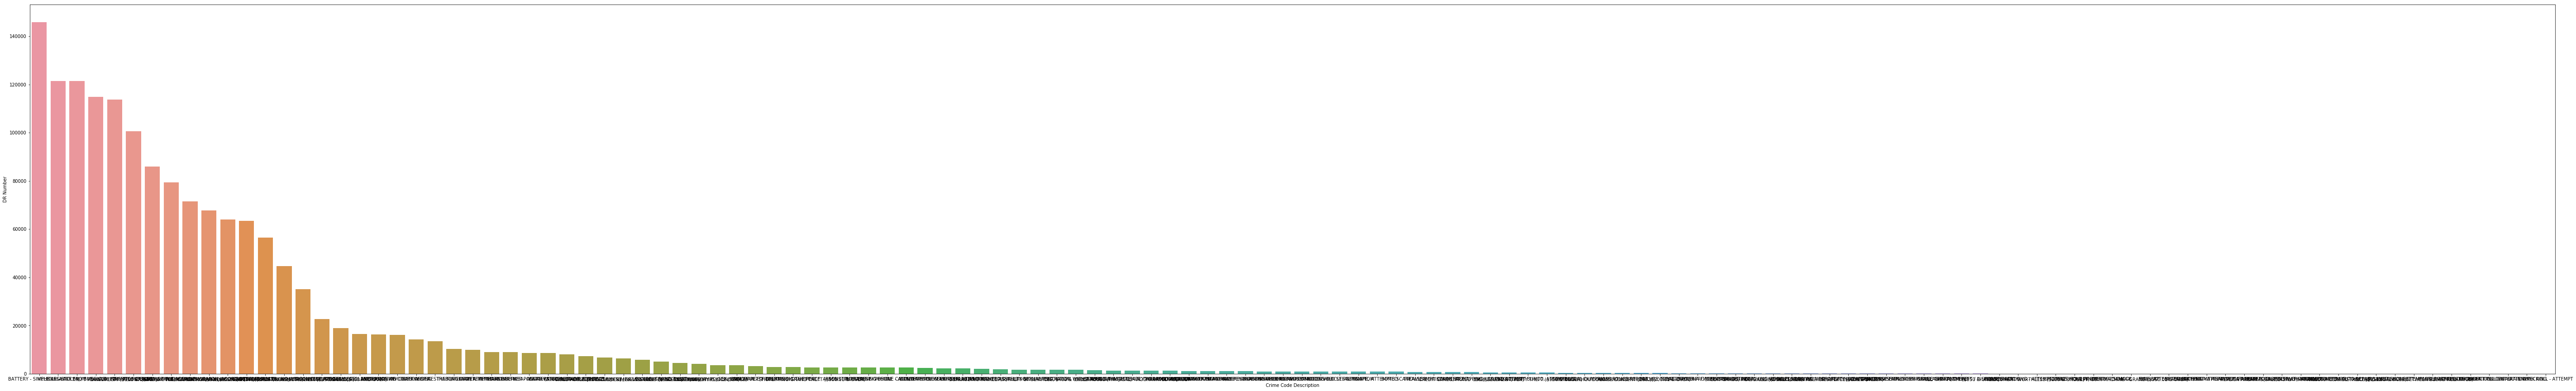

In [105]:
plt.subplots(figsize=(100,15))
sns.barplot(x="Crime Code Description", y="DR Number", data=unique_crimes)

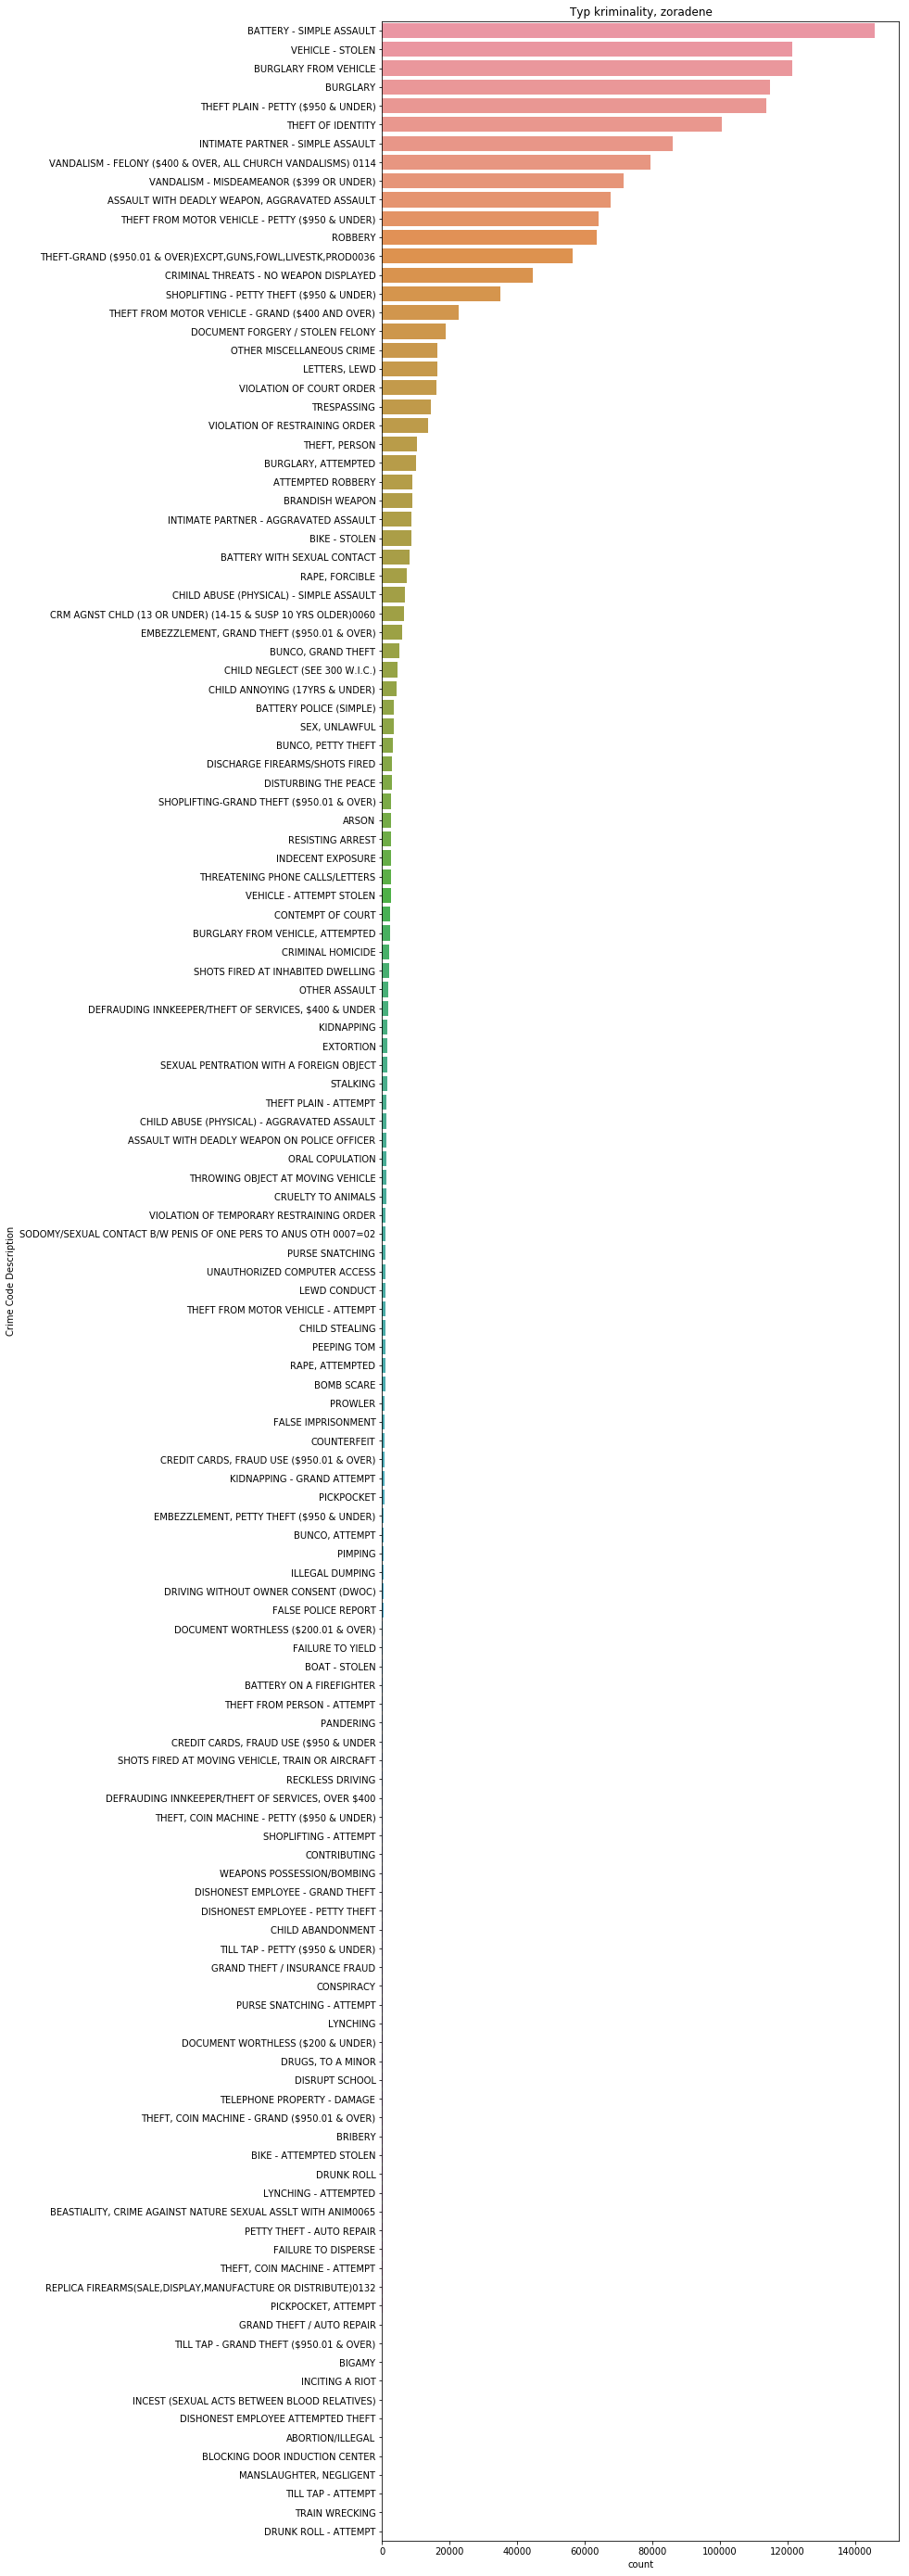

In [118]:

plt.figure(figsize=(10,50))
count = sns.countplot(
    data = data, 
    y = 'Crime Code Description',
    order = data['Crime Code Description'].value_counts().index
).set_title('Typ kriminality, zoradene')
plt.show()

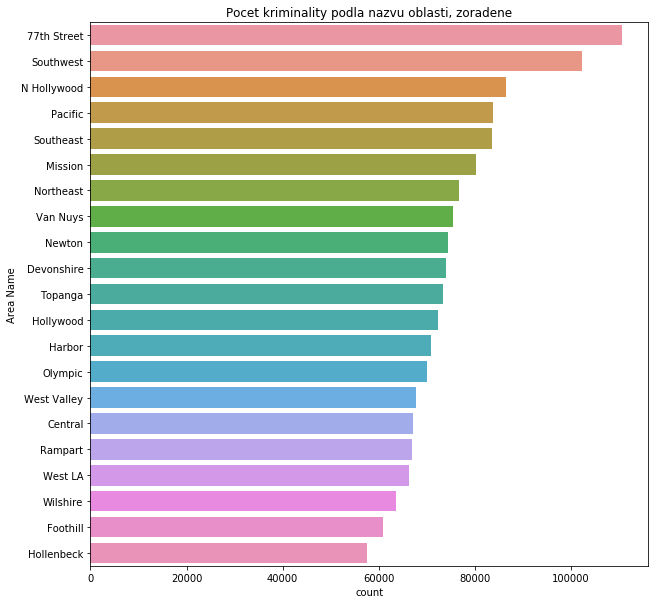

In [119]:
plt.figure(figsize=(10,10))
count = sns.countplot(
    data = data, 
    y = 'Area Name',
    order = data['Area Name'].value_counts().index
).set_title('Pocet kriminality podla nazvu oblasti, zoradene')
plt.show()

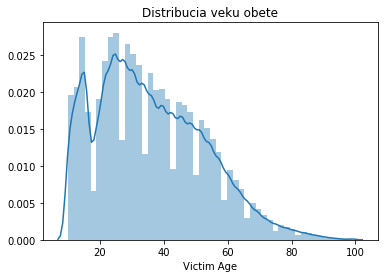

In [120]:
# Distribucia veku obete
sns.distplot(data['Victim Age'].dropna()).set_title('Distribucia veku obete')


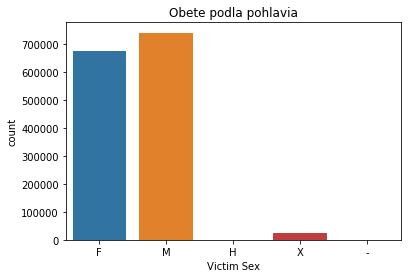

In [121]:
# Kriminalita podla pohlavia obete
sns.countplot('Victim Sex', data=data).set_title('Obete podla pohlavia')



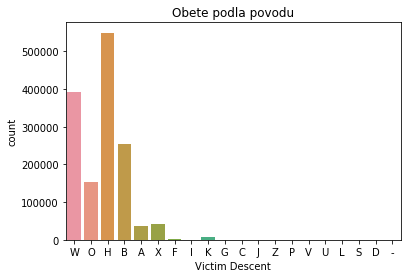

In [122]:
# Kriminalita podla povodu obete
sns.countplot('Victim Descent', data=data).set_title('Obete podla povodu')


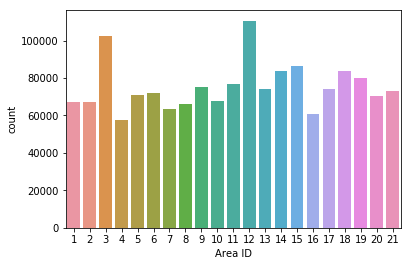

In [112]:
# Pocty kriminaly v oblastiach
sns.countplot(x='Area ID', data=data).set_title('Kriminalita v oblastiach')
